First we check the robustness of networks in case of errors: we randomly select and remove an f
fraction of nodes and measure the relative size of the giant component P∞(f)/P∞(0) as a function
of f for several networks (listed below) of sizes N = 103, 104, 105, 106
. For each network plot
P∞(f)/P∞(0) for all sizes on one figure. What do you see? Please think for a while and create all
networks with the same average degree < k >. How < k > influences results? Choose 3 values of
< k > and prepare figures for these values. It means that in total you should produce 9 figures - 3
for each of the following graphs:
- (a) The Watts-Strogatz graph W S(N, k, β) with β = 0.01
- (b) Random graph G(N, p)
- (c) The Barabasi-Albert graph

Please remember to label axis properly and provide a legend for N, as well as the title or the caption
for a graph.


In [132]:
import networkx as nx
import matplotlib.pyplot as plt
from numpy.random import shuffle, random
from collections import defaultdict, Counter
from pprint import pprint
from tqdm import tqdm

In [75]:
def avg_deg(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    div = sum(num for d, num in degreeCount.items())
    average = sum(d*num for d, num in degreeCount.items())/div
    return average

In [283]:
#  First we check the robustness of networks in case of errors:

def remove_conections(f, graph):
    nodes = list(graph.nodes())
    G = graph.copy()
    nodes = list(G.nodes)
    shuffle(nodes)
    for node in nodes[0:int(len(nodes)*f)]:
        G.remove_node(node)
    return G

def print_graph(G):
    plt.figure(figsize=(5,5))
    options = {
        'with_labels': True,
        'node_color': 'red',
        'node_size': 250,
        'width': 0.9,
    }
    nx.draw_circular(G, **options)
    plt.show()
    
def size_of_giant_component(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    if Gcc:
        G0 = G.subgraph(Gcc[0])
    else:
        G0 = G
    return G0.size()
    
def relative_size(f, G):
    G1 = remove_conections(f, G)
    return size_of_giant_component(G1)/float(size_of_giant_component(G))

# Different deegres #
First we check the robustness of networks in case of errors: we randomly select and remove an f
fraction of nodes and measure the relative size of the giant component P∞(f)/P∞(0) as a function
of f for several networks (listed below) of sizes N = 10^3, 10^4, 10^5, 10^6. For each network plot
P∞(f)/P∞(0) for all sizes on one figure. What do you see?

In [241]:
divisor = 20

In [242]:
# ws
# 1- k=5, beta=0,01
# dimension is equal k
def ws(k,size,init=3):
    from tqdm import tqdm
    k = 4
    beta = 0.01
    relative_sizes_ws = defaultdict(list)
    for power in range(init,init+size):
        N = 10**power
        for i in tqdm(range(0, N, int(N/divisor))):
            f = i/float(N)
            graph = nx.watts_strogatz_graph(N, k, beta, seed=None)
    #         print(avg_deg(graph))
            relative_sizes_ws[N].append((f, relative_size(f, graph)))
    return relative_sizes_ws
# pprint(relative_sizes_ws)

In [243]:
# random
def r(k,size,init=3):
    from tqdm import tqdm
    # 1 - p=0,005
    # k = p(N-1)
    #  how to cennect k and beta to p
    p = 0.005
    # p (float) – Probability for edge creation
    relative_sizes_r = defaultdict(list)
    for power in range(init,init+size):
        N = 10**power
        p = k/(N-1)
        for i in tqdm(range(0, N, int(N/divisor))):
            f = i/float(N)
            graph = nx.erdos_renyi_graph(N, p, seed=None)
    #         print(avg_deg(graph))
            relative_sizes_r[N].append((f, relative_size(f, graph)))
    return relative_sizes_r

In [244]:
# barabasi_albert_graph(n, m)
def ba(k,size,init=3):
    from tqdm import tqdm
    # 1 - m=1
    #  m = k/2
    m = int(k/2)
    # m (int) – Number of edges to attach from a new node to existing nodes
    relative_sizes_ba = defaultdict(list)
    for power in range(init,init+size):
        N = 10**power
        for i in tqdm(range(0, N, int(N/divisor))):
            f = i/float(N)
            graph = nx.barabasi_albert_graph(N, m, seed=None)
    #         print(avg_deg(graph))
            relative_sizes_ba[N].append((f, relative_size(f, graph)))
    return relative_sizes_ba

In [245]:
def plot_relative_size(relative_sizes):
    for key, value in relative_sizes.items():
        x, y = zip(*value)
        plt.plot(x, y, label=key)
    plt.title("Relative size depend of f")
    plt.ylabel("Relative size")
    plt.xlabel("f")
    plt.legend()
    plt.grid()
    plt.show()


  0%|                                                   | 0/20 [00:00<?, ?it/s]

ws



100%|██████████████████████████████████████████| 20/20 [00:02<00:00,  8.51it/s]

100%|██████████████████████████████████████████| 20/20 [00:16<00:00,  1.24it/s]


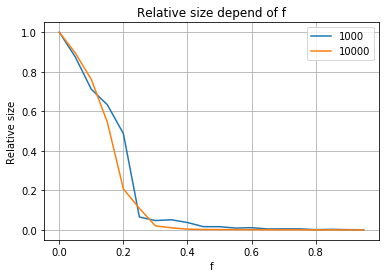

In [246]:
print("ws")
plot_relative_size(ws(4,2))


  5%|██▏                                        | 1/20 [00:00<00:02,  9.43it/s]

random



100%|██████████████████████████████████████████| 20/20 [00:02<00:00,  8.73it/s]


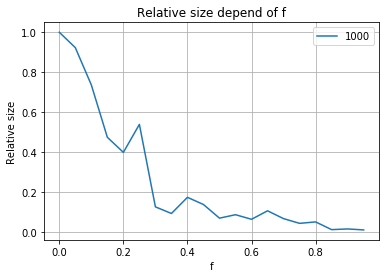

In [247]:
print('random')
plot_relative_size(r(1,1))


 10%|████▎                                      | 2/20 [00:00<00:00, 19.49it/s]

ba



100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 22.62it/s]

100%|██████████████████████████████████████████| 20/20 [00:08<00:00,  2.38it/s]


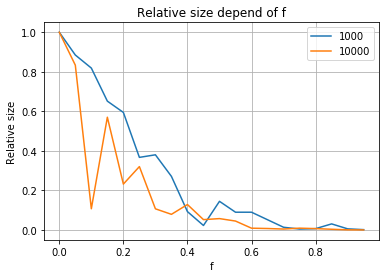

In [248]:
print('ba')
plot_relative_size(ba(2,2))

# same deegre
## k=2



  0%|                                                   | 0/20 [00:00<?, ?it/s]

 10%|████▎                                      | 2/20 [00:00<00:01, 16.81it/s]

ws




 20%|████████▌                                  | 4/20 [00:00<00:00, 16.51it/s]

 30%|████████████▉                              | 6/20 [00:00<00:00, 16.60it/s]

 45%|███████████████████▎                       | 9/20 [00:00<00:00, 17.84it/s]

 60%|█████████████████████████▏                | 12/20 [00:00<00:00, 19.18it/s]

 75%|███████████████████████████████▌          | 15/20 [00:00<00:00, 19.68it/s]

100%|██████████████████████████████████████████| 20/20 [00:01<00:00, 14.65it/s]


  0%|                                                   | 0/20 [00:00<?, ?it/s]

  5%|██▏                                        | 1/20 [00:00<00:11,  1.69it/s]

 10%|████▎                                      | 2/20 [00:01<00:11,  1.59it/s]

 15%|██████▍                                    | 3/20 [00:01<00:10,  1.69it/s]

 20%|████████▌                                  | 4/20 [00:02<00:09,  1.62it/s]

 25%|██████████▊                                | 5/20 [00:03<00:09,  1.63it/s]

 30%|████████████▉       

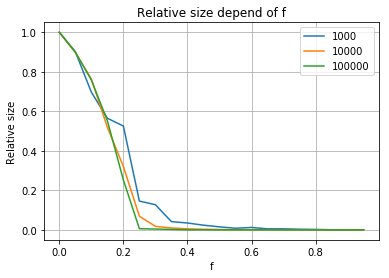

In [284]:
print("ws")
plot_relative_size(ws(2,3))



  0%|                                                   | 0/20 [00:00<?, ?it/s]

random




  5%|██▏                                        | 1/20 [00:00<00:04,  3.90it/s]

 10%|████▎                                      | 2/20 [00:00<00:04,  3.93it/s]

 15%|██████▍                                    | 3/20 [00:00<00:04,  4.10it/s]

 20%|████████▌                                  | 4/20 [00:00<00:03,  4.33it/s]

 25%|██████████▊                                | 5/20 [00:01<00:03,  4.41it/s]

 30%|████████████▉                              | 6/20 [00:01<00:02,  4.67it/s]

 35%|███████████████                            | 7/20 [00:01<00:02,  4.89it/s]

 40%|█████████████████▏                         | 8/20 [00:01<00:02,  5.05it/s]

 45%|███████████████████▎                       | 9/20 [00:01<00:02,  5.18it/s]

 50%|█████████████████████                     | 10/20 [00:02<00:01,  5.40it/s]

 55%|███████████████████████                   | 11/20 [00:02<00:01,  5.42it/s]

 60%|█████████████████████████▏                | 12/20 [00:02<00:01,  5.58it/s]

 65%|█████████████████████

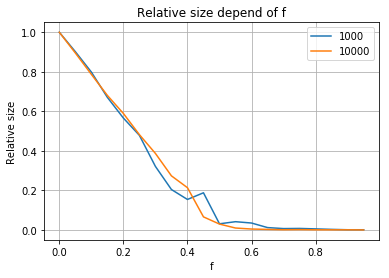

In [285]:
print('random')
plot_relative_size(r(2,2))



  0%|                                                   | 0/20 [00:00<?, ?it/s]

 15%|██████▍                                    | 3/20 [00:00<00:00, 25.42it/s]

ba




 30%|████████████▉                              | 6/20 [00:00<00:00, 26.02it/s]

 50%|█████████████████████                     | 10/20 [00:00<00:00, 28.12it/s]

 75%|███████████████████████████████▌          | 15/20 [00:00<00:00, 30.88it/s]

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 33.78it/s]


  0%|                                                   | 0/20 [00:00<?, ?it/s]

  5%|██▏                                        | 1/20 [00:00<00:08,  2.34it/s]

 10%|████▎                                      | 2/20 [00:00<00:07,  2.37it/s]

 15%|██████▍                                    | 3/20 [00:01<00:07,  2.33it/s]

 20%|████████▌                                  | 4/20 [00:01<00:06,  2.53it/s]

 25%|██████████▊                                | 5/20 [00:02<00:06,  2.38it/s]

 30%|████████████▉                              | 6/20 [00:02<00:05,  2.36it/s]

 35%|███████████████                            | 7/20 [00:02<00:05,  2.56it/s]

 40%|█████████████████▏  

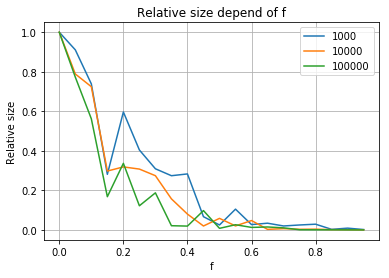

In [286]:
print('ba')
plot_relative_size(ba(2,3))

In [252]:
N = 3 # 10^N
def tree_deegre(function, klist=None):
    klist = [2,4,6] if not klist else klist
    result = {}
    for k in klist:
        result[k] = function(k,1,init=N)
    return result

def plot_3_deegre(result):
    for key, value in result.items():
        x, y = zip(*value[10**N])
        plt.plot(x, y, label='<k>' + str(key))
    plt.title("Relative size depend of f, ")
    plt.ylabel("Relative size")
    plt.xlabel("f")
    plt.legend()
    plt.grid()
    plt.show()


100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 23.06it/s]

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 26.55it/s]

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 24.68it/s]


{2: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.902), (0.1, 0.365), (0.15, 0.3905), (0.2, 0.109), (0.25, 0.0685), (0.3, 0.06), (0.35, 0.051), (0.4, 0.017), (0.45, 0.0295), (0.5, 0.024), (0.55, 0.0115), (0.6, 0.011), (0.65, 0.0045), (0.7, 0.0065), (0.75, 0.0045), (0.8, 0.003), (0.85, 0.0015), (0.9, 0.0015), (0.95, 0.0005)]}), 4: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.9055), (0.1, 0.794), (0.15, 0.357), (0.2, 0.2475), (0.25, 0.0995), (0.3, 0.031), (0.35, 0.03), (0.4, 0.0185), (0.45, 0.0225), (0.5, 0.023), (0.55, 0.009), (0.6, 0.009), (0.65, 0.0125), (0.7, 0.0035), (0.75, 0.0025), (0.8, 0.0035), (0.85, 0.0015), (0.9, 0.0035), (0.95, 0.001)]}), 6: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.9015), (0.1, 0.797), (0.15, 0.591), (0.2, 0.3765), (0.25, 0.111), (0.3, 0.0695), (0.35, 0.031), (0.4, 0.0235), (0.45, 0.0205), (0.5, 0.0135), (0.55, 0.01), (0.6, 0.009), (0.65, 0.006), (0.7, 0.003), (0.75, 0.003), (0.8, 0.0045), (0.85, 0.0015), (0.9, 0.001), (

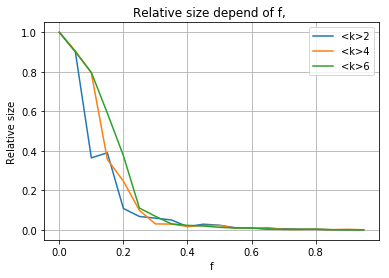

In [253]:
a=tree_deegre(ws)
print(a)
plot_3_deegre(a)


100%|██████████████████████████████████████████| 20/20 [00:02<00:00,  8.08it/s]

100%|██████████████████████████████████████████| 20/20 [00:02<00:00,  8.10it/s]

100%|██████████████████████████████████████████| 20/20 [00:03<00:00,  6.03it/s]


{2: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.8873096446700508), (0.1, 0.818082788671024), (0.15, 0.6098843322818086), (0.2, 0.5047619047619047), (0.25, 0.4736263736263736), (0.3, 0.35508021390374334), (0.35, 0.29959514170040485), (0.4, 0.0882936507936508), (0.45, 0.16666666666666666), (0.5, 0.038702928870292884), (0.55, 0.024608501118568233), (0.6, 0.020179372197309416), (0.65, 0.017857142857142856), (0.7, 0.01020408163265306), (0.75, 0.009316770186335404), (0.8, 0.008676789587852495), (0.85, 0.003092783505154639), (0.9, 0.0041109969167523125), (0.95, 0.0021551724137931034)]}), 4: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.8991678903573177), (0.1, 0.8033199195171026), (0.15, 0.7204193709435847), (0.2, 0.6453790238836968), (0.25, 0.5477738869434717), (0.3, 0.4712301587301587), (0.35, 0.416707859614434), (0.4, 0.3404471544715447), (0.45, 0.28375634517766496), (0.5, 0.25383473527956457), (0.55, 0.18631955079122), (0.6, 0.14831349206349206), (0.65, 0.102140077

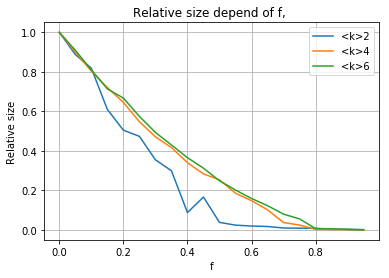

In [254]:
b=tree_deegre(r)
print(b)
plot_3_deegre(b)


100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 28.03it/s]

100%|██████████████████████████████████████████| 20/20 [00:01<00:00, 18.50it/s]

100%|██████████████████████████████████████████| 20/20 [00:01<00:00, 16.49it/s]


{2: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.8358358358358359), (0.1, 0.42242242242242245), (0.15, 0.5985985985985987), (0.2, 0.4344344344344344), (0.25, 0.35235235235235235), (0.3, 0.07907907907907907), (0.35, 0.12612612612612611), (0.4, 0.12212212212212212), (0.45, 0.07907907907907907), (0.5, 0.1001001001001001), (0.55, 0.08808808808808809), (0.6, 0.04104104104104104), (0.65, 0.04004004004004004), (0.7, 0.005005005005005005), (0.75, 0.009009009009009009), (0.8, 0.006006006006006006), (0.85, 0.003003003003003003), (0.9, 0.002002002002002002), (0.95, 0.002002002002002002)]}), 4: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.9008016032064128), (0.1, 0.7790581162324649), (0.15, 0.7339679358717435), (0.2, 0.6467935871743486), (0.25, 0.5991983967935872), (0.3, 0.4729458917835671), (0.35, 0.4423847695390782), (0.4, 0.37324649298597196), (0.45, 0.2965931863727455), (0.5, 0.2439879759519038), (0.55, 0.18637274549098196), (0.6, 0.19889779559118237), (0.65, 0.13476953

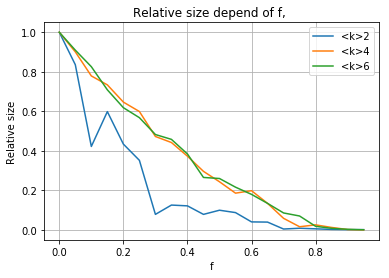

In [255]:
c=tree_deegre(ba)
print(c)
plot_3_deegre(c)

Now we check the robustness of networks in case of attacks: we first remove the highest degree node,
followed by the node with the next highest degree and so on until an f fraction of nodes is removed.
Then, analogously like in the previous task, we measure the relative size of the giant component
P∞(f)/P∞(0) as a function of f. Please repeat all calculations from the previous task and prepare
appropriate figures. How you can comment obtained results if you compare results obtain within
this task with the previous one?

In [279]:
# different relative size in case of attack
def remove_highest_conections(f, graph):
    G = graph.copy()
    deg = list(G.degree())
    shuffle(deg)
    nodes = sorted(deg, key=lambda x:x[1],reverse=True)
#     print(nodes)
    for node in nodes[0:int(len(nodes)*f)]:
#         print(node)
        G.remove_node(node[0])
    return G

def relative_size(f, G):
    G1 = remove_highest_conections(f, G)
    return size_of_giant_component(G1)/float(size_of_giant_component(G))



  0%|                                                   | 0/20 [00:00<?, ?it/s]

  5%|██▏                                        | 1/20 [00:00<00:01,  9.52it/s]

ws




 10%|████▎                                      | 2/20 [00:00<00:01,  9.06it/s]

 15%|██████▍                                    | 3/20 [00:00<00:01,  8.78it/s]

 25%|██████████▊                                | 5/20 [00:00<00:01, 10.13it/s]

 35%|███████████████                            | 7/20 [00:00<00:01, 11.19it/s]

 45%|███████████████████▎                       | 9/20 [00:00<00:00, 11.79it/s]

 55%|███████████████████████                   | 11/20 [00:00<00:00, 12.61it/s]

 65%|███████████████████████████▎              | 13/20 [00:01<00:00, 13.07it/s]

 80%|█████████████████████████████████▌        | 16/20 [00:01<00:00, 14.79it/s]

100%|██████████████████████████████████████████| 20/20 [00:01<00:00, 14.54it/s]


  0%|                                                   | 0/20 [00:00<?, ?it/s]

  5%|██▏                                        | 1/20 [00:00<00:11,  1.71it/s]

 10%|████▎                                      | 2/20 [00:01<00:09,  1.86it/s]

 15%|██████▍             

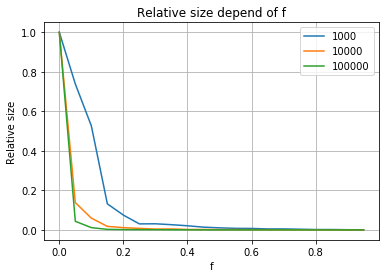

In [280]:
print("ws")
plot_relative_size(ws(2,3))



  0%|                                                   | 0/20 [00:00<?, ?it/s]

  5%|██▏                                        | 1/20 [00:00<00:02,  7.32it/s]

random




 10%|████▎                                      | 2/20 [00:00<00:02,  7.47it/s]

 15%|██████▍                                    | 3/20 [00:00<00:02,  8.01it/s]

 20%|████████▌                                  | 4/20 [00:00<00:02,  7.99it/s]

 25%|██████████▊                                | 5/20 [00:00<00:01,  8.33it/s]

 30%|████████████▉                              | 6/20 [00:00<00:01,  8.75it/s]

 35%|███████████████                            | 7/20 [00:00<00:01,  8.70it/s]

 40%|█████████████████▏                         | 8/20 [00:00<00:01,  8.56it/s]

 45%|███████████████████▎                       | 9/20 [00:01<00:01,  8.72it/s]

 50%|█████████████████████                     | 10/20 [00:01<00:01,  9.01it/s]

 55%|███████████████████████                   | 11/20 [00:01<00:00,  9.27it/s]

 60%|█████████████████████████▏                | 12/20 [00:01<00:00,  9.08it/s]

 65%|███████████████████████████▎              | 13/20 [00:01<00:00,  9.30it/s]

 70%|█████████████████████

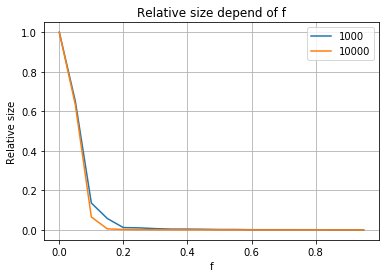

In [281]:
print('random')
plot_relative_size(r(2,2))



  0%|                                                   | 0/20 [00:00<?, ?it/s]

 15%|██████▍                                    | 3/20 [00:00<00:00, 26.09it/s]

ba




 30%|████████████▉                              | 6/20 [00:00<00:00, 25.60it/s]

 50%|█████████████████████                     | 10/20 [00:00<00:00, 27.23it/s]

 65%|███████████████████████████▎              | 13/20 [00:00<00:00, 27.83it/s]

 80%|█████████████████████████████████▌        | 16/20 [00:00<00:00, 22.46it/s]

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 24.76it/s]


  0%|                                                   | 0/20 [00:00<?, ?it/s]

  5%|██▏                                        | 1/20 [00:00<00:06,  2.80it/s]

 10%|████▎                                      | 2/20 [00:00<00:06,  2.79it/s]

 15%|██████▍                                    | 3/20 [00:01<00:07,  2.34it/s]

 20%|████████▌                                  | 4/20 [00:02<00:09,  1.65it/s]

 25%|██████████▊                                | 5/20 [00:03<00:11,  1.30it/s]

 30%|████████████▉                              | 6/20 [00:04<00:11,  1.18it/s]

 35%|███████████████     

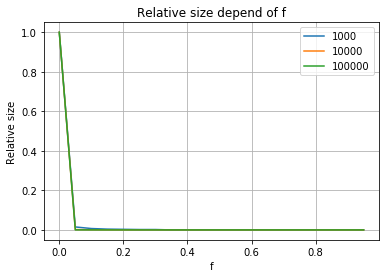

In [282]:
print('ba')
plot_relative_size(ba(2,3))



  0%|                                                   | 0/20 [00:00<?, ?it/s]

 10%|████▎                                      | 2/20 [00:00<00:01, 16.26it/s]

 20%|████████▌                                  | 4/20 [00:00<00:00, 16.38it/s]

 30%|████████████▉                              | 6/20 [00:00<00:00, 16.63it/s]

 40%|█████████████████▏                         | 8/20 [00:00<00:00, 17.29it/s]

 55%|███████████████████████                   | 11/20 [00:00<00:00, 19.57it/s]

 70%|█████████████████████████████▍            | 14/20 [00:00<00:00, 21.34it/s]

 85%|███████████████████████████████████▋      | 17/20 [00:00<00:00, 23.14it/s]

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 22.47it/s]


  0%|                                                   | 0/20 [00:00<?, ?it/s]

 10%|████▎                                      | 2/20 [00:00<00:01, 10.64it/s]

 25%|██████████▊                                | 5/20 [00:00<00:01, 12.94it/s]

 40%|█████████████████▏  

{2: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.3315), (0.1, 0.203), (0.15, 0.1485), (0.2, 0.0475), (0.25, 0.068), (0.3, 0.029), (0.35, 0.0445), (0.4, 0.016), (0.45, 0.0165), (0.5, 0.0165), (0.55, 0.005), (0.6, 0.008), (0.65, 0.0055), (0.7, 0.005), (0.75, 0.0025), (0.8, 0.0015), (0.85, 0.002), (0.9, 0.002), (0.95, 0.001)]}), 4: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.39), (0.1, 0.144), (0.15, 0.1345), (0.2, 0.078), (0.25, 0.0425), (0.3, 0.0525), (0.35, 0.017), (0.4, 0.027), (0.45, 0.0145), (0.5, 0.016), (0.55, 0.0095), (0.6, 0.0055), (0.65, 0.0055), (0.7, 0.0045), (0.75, 0.003), (0.8, 0.0015), (0.85, 0.0025), (0.9, 0.0015), (0.95, 0.001)]}), 6: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.733), (0.1, 0.3095), (0.15, 0.146), (0.2, 0.0935), (0.25, 0.0615), (0.3, 0.0305), (0.35, 0.0285), (0.4, 0.0185), (0.45, 0.014), (0.5, 0.0135), (0.55, 0.0085), (0.6, 0.0045), (0.65, 0.0085), (0.7, 0.004), (0.75, 0.0035), (0.8, 0.003), (0.85, 0.001), (0.9, 0.000

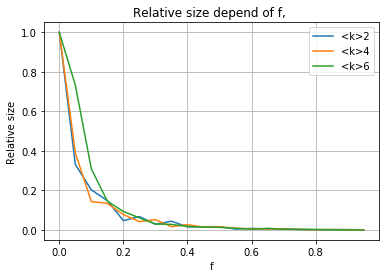

In [273]:
a=tree_deegre(ws)
print(a)
plot_3_deegre(a)



  0%|                                                   | 0/20 [00:00<?, ?it/s]

  5%|██▏                                        | 1/20 [00:00<00:07,  2.42it/s]

 10%|████▎                                      | 2/20 [00:00<00:06,  2.58it/s]

 15%|██████▍                                    | 3/20 [00:01<00:06,  2.55it/s]

 20%|████████▌                                  | 4/20 [00:01<00:06,  2.60it/s]

 25%|██████████▊                                | 5/20 [00:01<00:06,  2.48it/s]

 30%|████████████▉                              | 6/20 [00:02<00:05,  2.63it/s]

 35%|███████████████                            | 7/20 [00:02<00:04,  2.87it/s]

 40%|█████████████████▏                         | 8/20 [00:02<00:04,  2.87it/s]

 45%|███████████████████▎                       | 9/20 [00:03<00:03,  2.88it/s]

 50%|█████████████████████                     | 10/20 [00:03<00:03,  3.19it/s]

 55%|███████████████████████                   | 11/20 [00:03<00:02,  3.44it/s]

 60%|█████████████████████

{2: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.6223698781838317), (0.1, 0.13651137594799567), (0.15, 0.0360082304526749), (0.2, 0.015625), (0.25, 0.007502679528403001), (0.3, 0.004123711340206186), (0.35, 0.003956478733926805), (0.4, 0.004123711340206186), (0.45, 0.003061224489795918), (0.5, 0.003067484662576687), (0.55, 0.00196078431372549), (0.6, 0.0010570824524312897), (0.65, 0.0010030090270812437), (0.7, 0.001017293997965412), (0.75, 0.0011148272017837235), (0.8, 0.0), (0.85, 0.0), (0.9, 0.0), (0.95, 0.0)]}), 4: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.7890625), (0.1, 0.6493440968718466), (0.15, 0.5033011681056374), (0.2, 0.42291880781089414), (0.25, 0.31861998985286655), (0.3, 0.2699805068226121), (0.35, 0.02689486552567237), (0.4, 0.010015022533800702), (0.45, 0.010277492291880781), (0.5, 0.0038816108685104317), (0.55, 0.003424657534246575), (0.6, 0.0025188916876574307), (0.65, 0.0015228426395939086), (0.7, 0.001021972406745018), (0.75, 0.00096432015

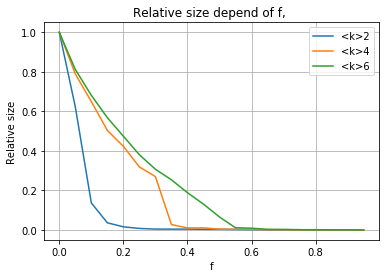

In [274]:
b=tree_deegre(r)
print(b)
plot_3_deegre(b)



  0%|                                                   | 0/20 [00:00<?, ?it/s]

 10%|████▎                                      | 2/20 [00:00<00:00, 19.23it/s]

 25%|██████████▊                                | 5/20 [00:00<00:00, 19.84it/s]

 40%|█████████████████▏                         | 8/20 [00:00<00:00, 20.46it/s]

 50%|█████████████████████                     | 10/20 [00:00<00:00, 17.54it/s]

 65%|███████████████████████████▎              | 13/20 [00:00<00:00, 19.95it/s]

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 23.61it/s]


  0%|                                                   | 0/20 [00:00<?, ?it/s]

 15%|██████▍                                    | 3/20 [00:00<00:00, 23.81it/s]

 25%|██████████▊                                | 5/20 [00:00<00:00, 21.91it/s]

 40%|█████████████████▏                         | 8/20 [00:00<00:00, 23.47it/s]

 50%|█████████████████████                     | 10/20 [00:00<00:00, 22.07it/s]

 60%|████████████████████

{2: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.013013013013013013), (0.1, 0.007007007007007007), (0.15, 0.005005005005005005), (0.2, 0.003003003003003003), (0.25, 0.001001001001001001), (0.3, 0.002002002002002002), (0.35, 0.0), (0.4, 0.0), (0.45, 0.0), (0.5, 0.0), (0.55, 0.0), (0.6, 0.0), (0.65, 0.0), (0.7, 0.0), (0.75, 0.0), (0.8, 0.0), (0.85, 0.0), (0.9, 0.0), (0.95, 0.0)]}), 4: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.5080160320641283), (0.1, 0.29509018036072143), (0.15, 0.04659318637274549), (0.2, 0.027054108216432865), (0.25, 0.0070140280561122245), (0.3, 0.002004008016032064), (0.35, 0.001503006012024048), (0.4, 0.001503006012024048), (0.45, 0.001503006012024048), (0.5, 0.0), (0.55, 0.0), (0.6, 0.0), (0.65, 0.0), (0.7, 0.0), (0.75, 0.0), (0.8, 0.0), (0.85, 0.0), (0.9, 0.0), (0.95, 0.0)]}), 6: defaultdict(<class 'list'>, {1000: [(0.0, 1.0), (0.05, 0.5526579739217653), (0.1, 0.39551989301237045), (0.15, 0.29254429956536276), (0.2, 0.20561685055165496),

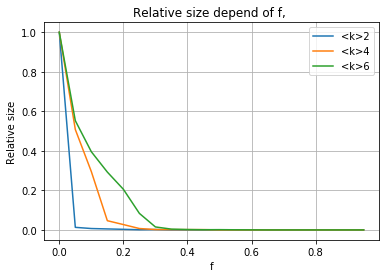

In [275]:
c=tree_deegre(ba)
print(c)
plot_3_deegre(c)